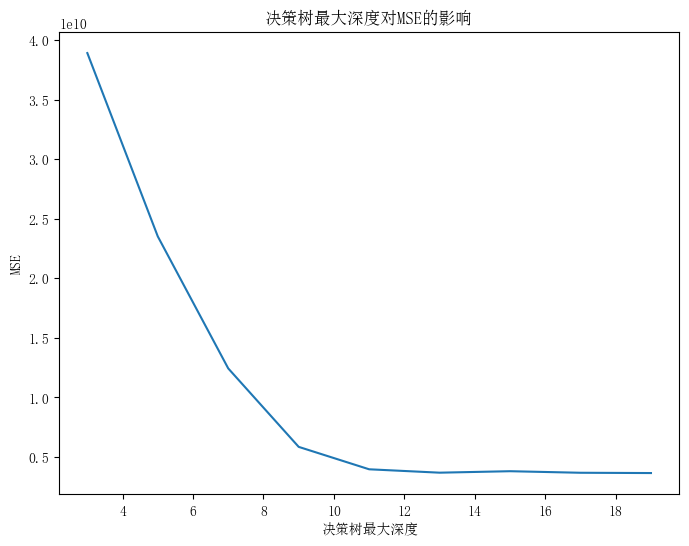

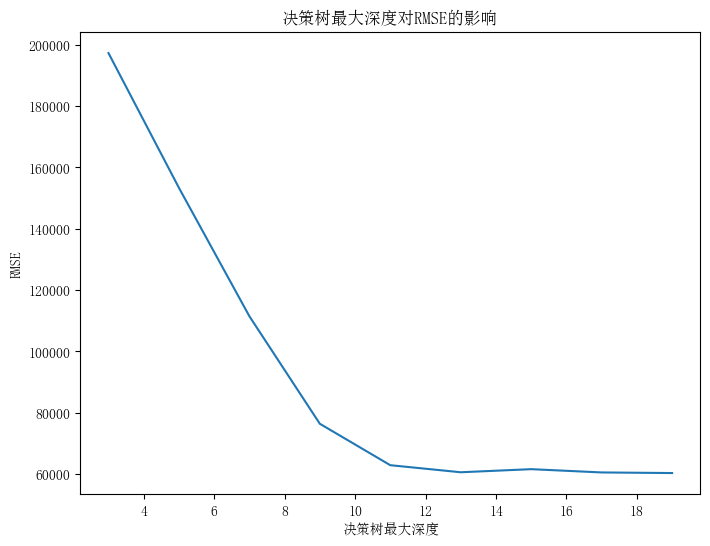

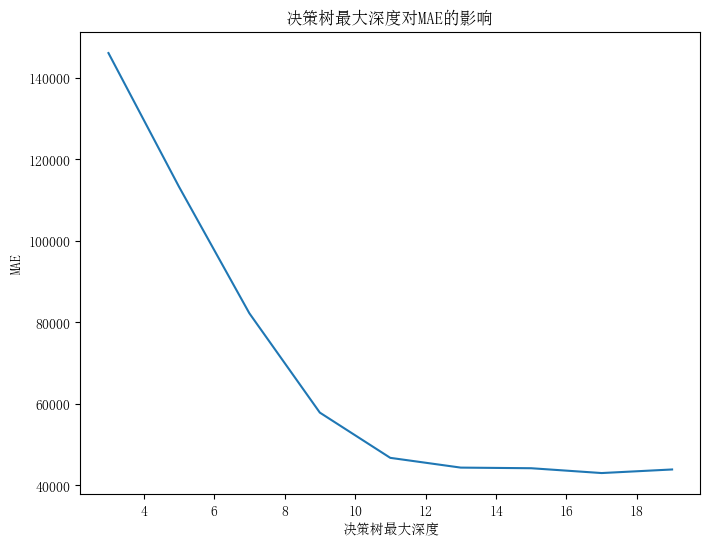

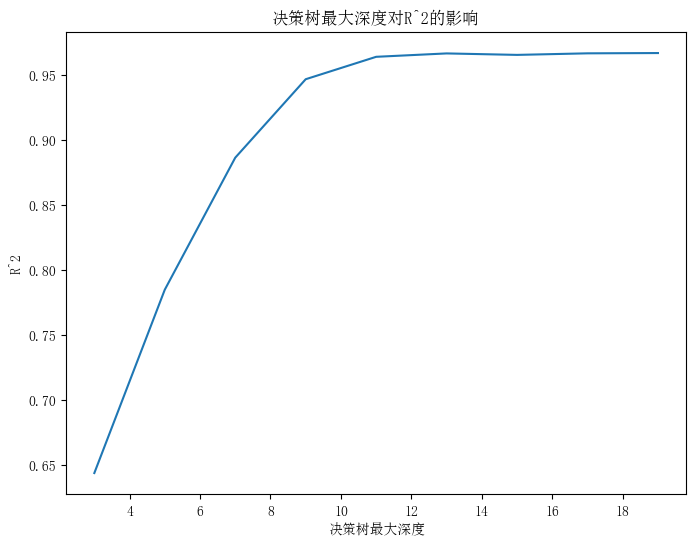

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
plt.rcParams['font.family'] = 'SimSun'
data = pd.read_csv('../newData.csv',encoding='gbk')

# 提取特征和标签
features = data[['月份', '日期', '星期几', '季节', '节假日']]
labels = data['航线金额']

# 定义决策树深度的范围
max_depths = [None] + list(range(3, 21, 2))

# 初始化存储评估指标的列表
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# 遍历决策树深度
for max_depth in max_depths:
    # 创建随机森林模型
    model = RandomForestRegressor(n_estimators=100,max_depth=max_depth)
    # 拟合模型
    model.fit(features, labels)
    # 进行预测
    predictions = model.predict(features)
    
    # 计算评估指标
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    
    # 将评估指标添加到列表中
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# 绘制MSE折线图
plt.figure(figsize=(8, 6))
plt.plot(max_depths, mse_scores)
plt.xlabel('决策树最大深度')
plt.ylabel('MSE')
plt.title('决策树最大深度对MSE的影响')

# 绘制RMSE折线图
plt.figure(figsize=(8, 6))
plt.plot(max_depths, rmse_scores)
plt.xlabel('决策树最大深度')
plt.ylabel('RMSE')
plt.title('决策树最大深度对RMSE的影响')

# 绘制MAE折线图
plt.figure(figsize=(8, 6))
plt.plot(max_depths, mae_scores)
plt.xlabel('决策树最大深度')
plt.ylabel('MAE')
plt.title('决策树最大深度对MAE的影响')

# 绘制R^2折线图
plt.figure(figsize=(8, 6))
plt.plot(max_depths, r2_scores)
plt.xlabel('决策树最大深度')
plt.ylabel('R^2')
plt.title('决策树最大深度对R^2的影响')

# 显示图形
plt.show()